## Model Ensembling and Validation

This notebok will import the models, combine them as a voting classifier and finally test compare the accuracy of the voting classifier with the accuracies of the individuals.

But before that we will see the accuracies of the individual modeld from a grid search.

In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Grid Search CV results 
result = pd.read_csv('./Data/result.csv')

In [3]:
result

,Unnamed: 0,Mean Score,Model
0,0,0.892762,Random Forest
1,1,0.893348,LGBM
2,2,0.891184,MLP
3,3,0.893168,XGBoost


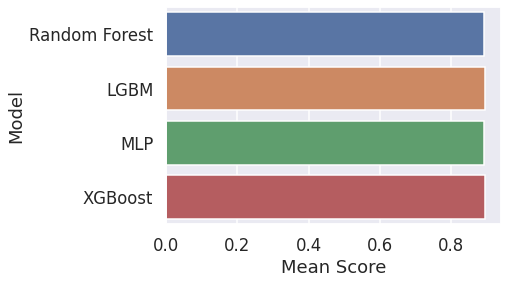

In [4]:
sns.set_theme('talk')
sns.barplot(data=result, x='Mean Score', y='Model')
plt.show()

**Observations**

1. All the models perform with an accuracy of over 85% with XGBoost performing marginally better



In [5]:
test = pd.read_csv('./Data/test.csv')
train = pd.read_csv('./Data/train.csv')

In [6]:
test.head()

,status,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,angel,crowdfunding,other,...,EU,NA,SA,UT,BZ,HE,LE,OT,PC,TR
0,3,0,0,1,-0.196244,0,0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0,2,-0.067206,2,12,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,-0.204481,1,3,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0,0,1,-0.094661,2,21,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,0,2,-0.177496,3,4,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
rf = joblib.load('./rf.joblib')
lgbm = joblib.load('./lgbm.joblib')
mlp = joblib.load('./mlp.joblib')
xgb = joblib.load('./xgb.joblib')

In [8]:
models = {'rf': rf, 'lgbm': lgbm, 'mlp': mlp, 'xgb': xgb}

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Both Soft and Hard Classifiers
main_clf_hard = VotingClassifier([(key, value) for key, value in models.items()], voting='hard', n_jobs=-1)
main_clf_soft = VotingClassifier([(key, value) for key, value in models.items()], voting='soft', n_jobs=-1)

In [11]:
# Testing on the test data
for clf in (rf, lgbm, mlp, xgb, main_clf_hard, main_clf_soft):
  clf.fit(train.drop(['status'], axis=1), train['status'])
  y_pred = clf.predict(test.drop(['status'], axis=1))
  print(clf.__class__.__name__, accuracy_score(test['status'], y_pred))

RandomForestClassifier 0.8922558922558923
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
LGBMClassifier 0.8937289562289562
MLPClassifier 0.8916245791245792
XGBClassifier 0.8925715488215489
VotingClassifier 0.8939393939393939
VotingClassifier 0.8933080808080808


**Observations**

1. LGBM performs well both on the train and test data
2. The hard voting classifier has marginal increase in performance